# Direct Methods for Solving Linear Systems of Equations

#### Learning outcomes

On successful completion of this page readers will be able to:

- Apply [LU decomposition](#LU-decomposition) to decompose a square matrix into a product of a lower triangular and upper triangular matrices.
- Apply [Crout's method](#Crout's-method) for solving a system of linear equations using LU decomposition.
- Solve a system of linear equations using LU decomposition with [partial pivoting](#Partial-pivoting).
- Apply [Cholesky decomposition](#Cholesky-decomposition) to decompose a positive definite matrix into a product of a lower triangular matrix and its transpose.
- Solve a system of linear equations using the [Cholesky-Crout method](#The-Cholesky-Crout-method).
- Apply [QR decomposition](#QR-decomposition) to decompose an $m\times n$ matrix into the product of an orthogonal matrix and an upper triangular matrix.
- Solve a [systems of linear equations using QR decomposition](#Solving-systems-of-linear-equations-using-QR-decomposition).

## Systems of linear equations

Linear systems of equations appear often in the topics of numerical analysis and numerical solutions to differential equations. The methods that are applied to solve systems of linear equations fall into one of two categories: **direct methods** that use an algebraic approach and **indirect methods** that use an iterative approach. On this page we will look at some common direct methods.

A [**system of linear equations**](https://en.wikipedia.org/wiki/System_of_linear_equations) with $m$ equations and $n$ unknowns can be expressed as

$$
\begin{aligned}
    a_{11} x_1 + a_{12} x_2 + \cdots + a_{1n} x_n &= b_1, \\
    a_{21} x_1 + a_{22} x_2 + \cdots + a_{2n} x_n &= b_2, \\
    & \vdots \\
    a_{m1} x_1 + a_{m2} x_2 + \cdots + a_{mn} x_n &= b_m.
\end{aligned}
$$

where $x_i$ are the unknowns, $a_{ij}$ are coefficients and $b_i$ are constant terms. It it often more convenient to express a system of linear equations as a matrix equation. Let $[A]_{ij} = a_{ij}$ be the **coefficient matrix**, $\mathbf{x} = (x_1, x_2, \ldots, x_m)^T$ be the **unknown vector** and $\mathbf{b} = (b_1, b_2, \ldots, b_m)^T$ be the **constant vector** then we can rewrite a system of linear equations as $A \mathbf{x} = \mathbf{b}$, i.e.,

$$
    \begin{pmatrix} 
        a_{11} & a_{12} & \cdots & a_{1n} \\
        a_{21} & a_{22} & \cdots & a_{2n} \\
        \vdots & \vdots & \ddots & \vdots \\
        a_{m1} & a_{m2} & \cdots & a_{mn}
    \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{pmatrix} =
    \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_m \end{pmatrix}.
$$

---
## LU decomposition

[**LU decomposition**](https://en.wikipedia.org/wiki/LU_decomposition) (also known as **LU factorisation**) is a procedure for decomposing a square matrix $A$ into the product of a **lower triangular** matrix $L$ and an **upper triangular** matrix $U$ such that

$$A = L U.$$

The advantage of writing a matrix as a product of $L$ and $U$ is that the solution to a triangular set of equations is easy to calculate using forward and back substitution.

Consider the LU decomposition of a $3\times 3$ matrix

$$
\begin{aligned}
    \begin{pmatrix}
        a_{11} & a_{12} & a_{13} \\
        a_{21} & a_{22} & a_{23} \\
        a_{31} & a_{32} & a_{33}
    \end{pmatrix} &=
    \begin{pmatrix}
        \ell_{11} & 0 & 0 \\
        \ell_{21} & \ell_{22} & 0 \\
        \ell_{31} & \ell_{32} & \ell_{33}
    \end{pmatrix}
    \begin{pmatrix}
        u_{11} & u_{12} & u_{13} \\
        0 & u_{22} & u_{23} \\
        0 & 0 & u_{33}
    \end{pmatrix} \\ &=
    \begin{pmatrix}
        \ell_{11} u_{11} & \ell_{11} u_{12} & \ell_{11} u_{13} \\
        \ell_{21} u_{11} & \ell_{21} u_{12} + \ell_{22} u_{22} & \ell_{21}u_{13} + \ell_{22} u_{23} \\
        \ell_{31} u_{11} & \ell_{31} u_{12} + \ell_{32} u_{22} & \ell_{31} u_{13} + \ell_{32} u_{23} + \ell_{33} u_{33}
    \end{pmatrix},
\end{aligned}
$$

which gives a system of 9 equations (one for each element in $A$) in 12 unknowns which has an infinite number of solutions. If we use the condition $\ell_{ii}=1$ then

$$\begin{pmatrix}
        a_{11} & a_{12} & a_{13} \\
        a_{21} & a_{22} & a_{23} \\
        a_{31} & a_{32} & a_{33}
    \end{pmatrix} =
    \begin{pmatrix}
        u_{11} & u_{12} & u_{13} \\
        \ell_{21} u_{11} & \ell_{21} u_{12} + u_{22} & \ell_{21}u_{13} + u_{23} \\
        \ell_{31} u_{11} & \ell_{31} u_{12} + \ell_{32} u_{22} & \ell_{31} u_{13} + \ell_{32} u_{23} + u_{33}
    \end{pmatrix}.$$
      
The elements in the lower triangular region ($i>j$) are

$$a_{ij} = \sum_{k=1}^j \ell_{ik}u_{kj} = \ell_{ij}u_{jj} + \sum_{k=1}^{j-1} \ell_{ik}u_{kj},$$

which is rearranged to

```{math}
:label: LU_lij
\ell_{ij} = \frac{1}{u_{jj}} \left( a_{ij} - \sum_{k=1}^{j-1} \ell_{ik} u_{kj}\right).
```

For the elements in the upper triangular region ($i\leq j$) we have

$$a_{ij} = u_{ij} + \sum_{k=1}^{i-1} \ell_{ik}u_{kj},$$

which is rearranged to

```{math}
:label: LU_uij
u_{ij} = a_{ij} - \sum_{k=1}^{i-1} \ell_{ik}u_{kj}.
```

So to calculate the LU decomposition of a square matrix $A$ we loop through each column of $A$ and calculate the elements of $L$ and $U$ for that column using equations {eq}`LU_lij` and {eq}`LU_uij`, i.e., 

$$
\begin{aligned}
    u_{ij} &= a_{ij} - \sum_{k=1}^{i-1} \ell_{ik}u_{kj}, \qquad i = 1, 2, \ldots j, \\
    \ell_{ij} &= 
    \begin{cases} 
        1, & i=j, \\
        \dfrac{1}{u_{jj}} \left( a_{ij} - \displaystyle\sum_{k=1}^{j-1} \ell_{ik} u_{kj}\right), & i = j+1, j+2, \ldots, n
    \end{cases}
\end{aligned}
$$

#### Example 1

Determine the LU decomposition of the following matrix

$$A = \begin{pmatrix} 1 & 3 & 0 \\ 2 & -4 & -1 \\ -3 & 1 & 2 \end{pmatrix}.$$

Stepping through the columns of $A$

$$
\begin{aligned}
    j &= 1: & u_{11} &= a_{11} = 1, \\
    && \ell_{21} &= \frac{1}{u_{11}}(a_{21}) = \frac{1}{1}(2) = 2, \\
    && \ell_{31} &= \frac{1}{u_{11}}(a_{31}) = \frac{1}{1}(-3) = -3, \\
    j &= 2: & u_{12} &= a_{12} = 3, \\
    && u_{22} &= a_{22} - \ell_{21}u_{12} = -4 - 2(3) = -10, \\
    && \ell_{32} &= \frac{1}{u_{22}}(a_{32} - \ell_{31}u_{12}) = \frac{1}{-10}(1 + 3(3)) = 1, \\
    j &= 3: & u_{13} &= a_{13} = 0, \\
    && u_{23} &= a_{23} - \ell_{21}u_{13} = -1 - 2(0) = -1, \\
    && u_{33} &= a_{33} - \ell_{31}u_{13} - \ell_{32}u_{23} = 2 + -3(0) - 1(-1) = 3.
\end{aligned}
$$

Therefore 

$$
\begin{aligned}
    L &= \begin{pmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ -3 & -1 & 1 \end{pmatrix}, &
    U &= \begin{pmatrix} 1 & 3 & 0 \\ 0 & -10 & -1 \\ 0 & 0 & 1 \end{pmatrix}.
\end{aligned}
$$

Checking that $L U=A$

$$
\begin{aligned}
    \begin{pmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ -3 & -1 & 1 \end{pmatrix}
    \begin{pmatrix} 1 & 3 & 0 \\ 0 & -10 & -1 \\ 0 & 0 & 1 \end{pmatrix} = 
    \begin{pmatrix} 1 & 3 & 0 \\ 2 & -4 & -1 \\ -3 & 1 & 2 \end{pmatrix}.
\end{aligned}
$$

#### Example 2

The function defined below called `LU` calculates the LU decomposition of a square matrix `A`.

In [1]:
import numpy as np

def lu(A):
    '''
    Calculates the LU decomposition of the square matrix A
    '''
    # Initialise L and U
    ncols = len(A)
    L = np.eye(ncols)
    U = np.zeros((ncols, ncols))

    # Loop through columns
    for j in range(ncols):
        
        # Calculate u_ij for i <= j
        for i in range(j+1):
            for k in range(i):
                U[i,j] += L[i,k] * U[k,j]
            U[i,j] = A[i,j] - U[i,j]
            
        # Calculate l_ij for i > j
        for i in range(j+1, ncols):
            for k in range(j):
                L[i,j] += L[i,k] * U[k,j]
            L[i,j] = (A[i,j] - L[i,j]) / U[j, j]
        
    return L, U

The code below uses the function `lu` to calculate the LU decomposition of the matrix from [example 1](#Example-1).

In [2]:
# Define matrix A
A = np.array([[ 1, 3, 0 ],
              [ 2, -4, -1 ],
              [ -3, 1, 2 ]])

# Calculate L and U
L, U = lu(A)

# Output L and U and check results
print('L = \n')
print(L)
print('\nU = \n')
print(U)
print('\nCheck that A - L.U = 0\n')
print(A - np.matmul(L, U))

L = 

[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [-3. -1.  1.]]

U = 

[[  1.   3.   0.]
 [  0. -10.  -1.]
 [  0.   0.   1.]]

Check that A - L.U = 0

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


---
## Crout's method

Given a system of linear equations of the form $A\mathbf{x} = \mathbf{b}$ then the solution can be calculated using the LU decomposition of $A$ using **Crout's method**. Since $A=LU$ then

$$LU\mathbf{x} = \mathbf{b}.$$
    
Let $\mathbf{y} = U\mathbf{x}$ then

$$L \mathbf{y} = \mathbf{b}.$$

$L$ is lower triangular so the solution for $L\mathbf{y}=\mathbf{b}$ is easily calculated using forward substitution. Once $\mathbf{y}$ has been calculated the solution to $U\mathbf{x} = \mathbf{y}$ is calculated using back substitution. 

The advantage of using Crout's algorithm is that once the LU decomposition of the coefficient matrix has been calculated the can be used for any values of the right-hand side vector $\mathbf{b}$ unlike Gaussian elimination where row reduction will need to be repeated for difference values of $\mathbf{b}$.

#### Example 3

Use Crout's method to solve the following system of linear equations

$$
\begin{pmatrix} 1 & 3 & 0 \\ 2 & -4 & -1 \\ -3 & 1 & 2 \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
\begin{pmatrix} -7 \\ 11 \\ 1 \end{pmatrix}.
$$

We saw in [example 1](#Example-1) that the $LU$ decomposition of the coefficient matrix is

$$
    L = \begin{pmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ -3 & -1 & 1 \end{pmatrix}, \qquad
    U = \begin{pmatrix} 1 & 3 & 0 \\ 0 & -10 & -1 \\ 0 & 0 & 1 \end{pmatrix}.
$$

Solving $L \mathbf{y} = \mathbf{b}$

$$
\begin{pmatrix} 1 & 0 & 0 \\ 2 & 1 & 0 \\ -3 & -1 & 1 \end{pmatrix}
  \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix} = 
  \begin{pmatrix} -7 \\ 11 \\ 1 \end{pmatrix},
$$

gives

$$
\begin{aligned}
y_1 &= -7, \\ 
y_2 &= 11 - 2y_1 = - 2(-7) = 25, \\ 
y_3 &= -1 + 3y_1 + y_2 = -1 + 3(-7) + 1(25) = 5.
\end{aligned}
$$

Solving $U \mathbf{x} = \mathbf{y}$

$$
\begin{aligned}
    \begin{pmatrix} 1 & 3 & 0 \\ 0 & -10 & -1 \\ 0 & 0 & 1 \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} &= 
    \begin{pmatrix} -7 \\ 25 \\ 5 \end{pmatrix},
\end{aligned}
$$

gives

$$
\begin{aligned}
    x_3 &= \frac{1}{1}x_3 = 5, \\
    x_2 &= \frac{1}{-10}(25 + x_3) = -\frac{1}{10}(25+5) = -3, \\
    x_1 &= \frac{1}{1}(-7 - 0x_3 - 3x_2) = -7 + 9 = 2.
\end{aligned}
$$

So the solution is $\mathbf{x} = (2, -3, 5)$.

#### Example 4
The function defined below called `crout` solves the system of linear equations $LU\mathbf{x}=\mathbf{b}$ using Crout's method.

In [3]:
def forward_sub(L, b):
    '''
    Calculates the solution to Lx = b where L is a lower triangular matrix
    using forward substitution
    '''
    ncols = L.shape[1]
    x = np.zeros(ncols)
    for i in range(ncols):
        for j in range(0, i):
            x[i] += L[i,j] * x[j]
        x[i] = (b[i] - x[i]) / L[i, i]   
        
    return x

def back_sub(U, b):
    '''
    Calculates the solution to Ux = b where U is a upper triangular matrix
    using back substitution
    '''
    ncols = U.shape[1]
    x = np.zeros(ncols)
    for i in range(ncols-1, -1, -1):
        for j in range(i, ncols):
            x[i] += U[i,j] * x[j]
        x[i] = (b[i] - x[i]) / U[i,i]
        
    return x 

def crout(L, U, b):
    '''
    Calculates the solution to the system of linear equations LUx=b using Crouts
    algorithm
    '''
    # Solve Ly = b using forward substitution
    y = forward_sub(L, b)
    
    # Solve Ux = y using back substitution
    x = back_sub(U, y) 
    
    return x 

The code below uses the function `crout` to solve the system of linear equations from [example 3](#Example-3).

In [4]:
# Define system of linear equations
A = np.array([[1, 3, 0],
              [2, -4, -1],
              [-3, 1, 2 ]])
b = np.array([-7, 11, 1])

# Calculate LU decomposition of A
L, U = lu(A)

# Calculate solution to Ax = b using Crout's method
x = crout(L, U, b)

# Output results
for i in range(len(x)):
    print('x_{} = {}'.format(i + 1, x[i]))

x_1 = 2.0
x_2 = -3.0
x_3 = 5.0


---
## Partial pivoting

A problem that can be encountered with LU decomposition is that if the value of $u_{jj}$ in equation [(1)](#LU_lij) is zero or some small number it will mean that $\ell_{ij}$ is undefined or prone to computational rounding errors due to the resulting value being very large (this is known as an [ill-conditioned system](https://en.wikipedia.org/wiki/Condition_number)). 

This problem can be overcome by using [**partial pivoting**](https://en.wikipedia.org/wiki/Pivot_element#Partial_and_complete_pivoting) where rows of the coefficient matrix are permuted so that the pivot element on the main diagonal is the larger than the elements in the column beneath it. The permutations applied to the coefficient matrix are recorded in a matrix $P$ which is determined by applying the same permutations to the identity matrix.

#### Example 5

Apply partial pivoting the following matrix and determine the permutation matrix $P$

$$A = \begin{pmatrix} 0 & 1 & -2 \\ 1 & 0 & 2 \\ 3 & -2 & 2 \end{pmatrix}.$$

Using row operations

$$
\begin{aligned}
    \begin{pmatrix} 0 & 1 & -2 \\ 1 & 0 & 2 \\ 3 & -2 & 2 \end{pmatrix}
    R_1 \leftrightarrow R_3 &
    & \longrightarrow &
    & \begin{pmatrix} 3 & -2 & 2 \\ 1 & 0 & 2 \\ 0 & 1 & -2 \end{pmatrix}
    R_2 \leftrightarrow R_3 &
    & \longrightarrow &
    & \begin{pmatrix} 3 & -2 & 2 \\ 0 & 1 & -2 \\ 1 & 0 & 2 \end{pmatrix}.
\end{aligned}
$$

Applying the same row operations to the identity matrix

$$
\begin{aligned}
    \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}
    R_1 \leftrightarrow R_3 &
    & \longrightarrow &
    & \begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\1 & 0 & 0 \end{pmatrix}
    R_2 \leftrightarrow R_3 &
    & \longrightarrow &
    & \begin{pmatrix} 0 & 0 & 1 \\1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}.
\end{aligned}
$$

So $P = \begin{pmatrix} 0 & 0 & 1 \\1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}$. Note that $PA$ gives the matrix $A$ after partial pivoting has been applied, i.e.,

$$\begin{pmatrix} 0 & 0 & 1 \\1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}
\begin{pmatrix} 0 & 1 & -2 \\ 1 & 0 & 2 \\ 3 & -2 & 2 \end{pmatrix}
=\begin{pmatrix} 3 & -2 & 2 \\ 0 & 1 & -2 \\ 1 & 0 & 2 \end{pmatrix}.$$

#### Example 6

The function defined below called `partial_pivot` calculates the permutation matrix $P$ for applying partial pivoting to the square matrix $A$.

In [5]:
def partial_pivot(A):
    '''
    Applies partial pivotting to A and returns the permutation matrix P
    '''
    ncols = len(A)
    P = np.eye(ncols)
    
    # Loop through columns
    for j in range(ncols):
        
        # Look for max pivot
        maxpivot, k = A[j,j], j
        for i in range (j, ncols):
            if abs(A[i,j]) > abs(maxpivot):
                maxpivot, k = A[i,j], i
        
        # Swap pivot row with max pivot row
        P[[j,k],:] = P[[k,j],:]
    
    return P

The code below uses the function `partial_pivot` to compute the permutation matrix $P$ for the matrix $A$ from [example 5](#Example-5).

In [6]:
# Define A matrix
A = np.array([[0, 1, -2],
             [1, 0, 2],
             [3, -2, 2]])

# Calculate permutation matrix P
P = partial_pivot(A)

print('P =\n')
print(P)

P =

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


---
## LU decomposition with partial pivoting

To calculate **LU decomposition with partial pivoting** uses the process as before with the exception that the coefficient matrix has partial pivoting applied prior to the calculation of $L$ and $U$, i.e.,

$$LU = PA.$$

Using partial pivoting on the coefficient matrix $A$ when solving the system of linear equations $A\mathbf{x}=\mathbf{b}$ results in

$$PA \mathbf{x} = \mathbf{b},$$

and since $P^{-1}=P$ (the inverse operation of swapping any two rows is to simply swap them back) then

$$A \mathbf{x} = P\mathbf{b}.$$

So Crout's algorithm when using LU decomposition with partial pivoting requires solving the following for $\mathbf{y}$ and $\mathbf{x}$

\begin{align*}
    L\mathbf{y} &= P \mathbf{b}, \\
    U\mathbf{x} &= \mathbf{y}. 
\end{align*}

#### Example 7

Solve the following system of linear equations using Crout's algorithm using LU decomposition with partial pivoting

$$
\begin{pmatrix} 0 & 1 & -2 \\ 1 & 0 & 2 \\ 3 & -2 & 2 \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} = 
\begin{pmatrix} 10 \\ -4 \\ -8 \end{pmatrix}.
$$

We have seen from [example 5](#Example-5) that applying partial pivoting to the ceofficient matrix results in

$$
    A = \begin{pmatrix} 3 & -2 & 2 \\ 0 & 1 & -2 \\ 1 & 0 & 2 \end{pmatrix}, \qquad
    P = \begin{pmatrix} 0 & 0 & 1 \\1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}.
$$

Calculating the LU decomposition of $A$ using equations [(3)](#LU) and [(4)](#LU)

$$
\begin{aligned}
    j &= 1: & u_{11} &= a_{11} = 3, \\
    && \ell_{21} &= \frac{1}{u_{11}}a_{21} = \frac{1}{3}(0) = 0, \\
    && \ell_{31} &= \frac{1}{u_{11}}a_{31} = \frac{1}{3}(1) = \frac{1}{3}, \\
    j &= 2: & u_{12} &= a_{12} = -2, \\
    && u_{22} &= a_{22} - \ell_{21}u_{12} = 1 - 0(-2) = 1, \\
    && \ell_{32} &= \frac{1}{u_{22}}(a_{32} - \ell_{31}u_{12}) = \frac{1}{1}\left(0 - \frac{1}{3}(-2)\right) = \frac{2}{3}, \\
    j &= 3: & u_{13} &= a_{13} = 2, \\
    && u_{23} &= a_{23} - \ell_{21}u_{12} = -2 - 0(-2) = -2, \\
    && u_{33} &= a_{33} - \ell_{31}u_{13} - \ell_{32}u_{23} = 2 - \frac{1}{3}(2) - \frac{2}{3}(-2) = \frac{8}{3}.
\end{aligned}
$$

Therefore

$$
\begin{aligned}
    L = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ \frac{1}{3} & \frac{2}{3} & 1 \end{pmatrix}, \qquad
    U = \begin{pmatrix} 3 & -2 & 2 \\ 0 & 1 & -2 \\ 0 & 0 & \frac{8}{3} \end{pmatrix}.
\end{aligned}

Solving $L\mathbf{y} = P\mathbf{b}$ using forward substitution

$$
\begin{aligned}
    \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ \frac{1}{3} & \frac{2}{3} & 1 \end{pmatrix}
    \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix} &= 
    \begin{pmatrix} 0 & 0 & 1 \\1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}
    \begin{pmatrix} 10 \\ -4 \\ -8 \end{pmatrix} = \begin{pmatrix} -8 \\ 10 \\ -4 \end{pmatrix},
\end{aligned}
$$

gives

$$
\begin{aligned}
    y_1 &= -8, \\
    y_2 &= 10 - 0(8) = 10, \\
    y_3 &= -4 - \frac{1}{3}(8) + \frac{2}{3}(10) = -8.
\end{aligned}
$$

Solving $U\mathbf{x}=\mathbf{y}$ using back substitution

$$
\begin{aligned}
    \begin{pmatrix} 3 & -2 & 2 \\ 0 & 1 & -2 \\ 0 & 0 & \frac{8}{3} \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
    \begin{pmatrix} -8 \\ 10 \\ -8 \end{pmatrix},
\end{aligned}
$$

gives

$$
\begin{aligned}
    x_3 &= \frac{3}{8}(-8) = -3, \\
    x_2 &= \frac{1}{1}(10 + 2(-3)) = 4, \\
    x_1 &= \frac{1}{3}(-8 + 2(4) - 2(-3)) = 2,
\end{aligned}
$$

So the solution is $\mathbf{x}=(2, 4, -3)$.

#### Example 8

The code below uses the previously defined functions `partial_pivot`, `LU` and `crout` to solve the system of linear equations from [example 7](#Example-7) using LU decomposition with partial pivoting.

In [7]:
# Define system of linear equations
A = np.array([[ 0, 1, -2 ],
              [ 1, 0, 2 ],
              [ 3, -2, 2 ]])
b = np.array([ 10, -4, -8 ])

# Calculate permutation matrix P
P = partial_pivot(A)

# Calculate LU decomposition of PA
PA = np.matmul(P, A)
L, U = lu(PA)

# Use Crout's method to solve LUx = Pb
Pb = np.matmul(P, b)
x = crout(L, U, Pb)

# Output results
for i in range(len(x)):
    print('x_{} = {}'.format(i+1, x[i]))

x_1 = 2.0
x_2 = 4.0
x_3 = -3.0


---
## Cholesky decomposition

[Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition) is an efficient decomposition method that can be used when a square matrix is [**positive definite**](https://en.wikipedia.org/wiki/Definite_symmetric_matrix). 

<a id="positive_definite"></a>

```{admonition} **Definition** Positive definite matrix
A symmetric square matrix $A$ is said to be positive definite if $\mathbf{x}^T A \mathbf{x}$ is positive for any non-zero column vector $\mathbf{x}$.
```

Given a positive definite matrix $A$ then Cholesky decomposition is used to decompose $A$ into the product of a lower triangular matrix $L$ and its transpose, i.e.,

$$A = LL^T.$$

Consider the Cholesky decomposition of a $3\times 3$ matrix

$$
\begin{aligned}
    \begin{pmatrix}
        a_{11} & a_{12} & a_{13} \\
        a_{21} & a_{22} & a_{23} \\
        a_{31} & a_{32} & a_{33}
    \end{pmatrix} &=
    \begin{pmatrix}
        \ell_{11} & 0 & 0 \\
        \ell_{21} & \ell_{22} & 0 \\
        \ell_{31} & \ell_{32} & \ell_{33}
    \end{pmatrix}
    \begin{pmatrix} 
        \ell_{11} & \ell_{21} & \ell_{31} \\
        0 & \ell_{22} & \ell_{32} \\
        0 & 0 & \ell_{33}
    \end{pmatrix} \\
    &= \begin{pmatrix}
        \ell_{11}^2 & \ell_{11} \ell_{21} & \ell_{11} \ell_{31} \\
        \ell_{11} \ell_{21} & \ell_{21}^2 +  \ell_{22}^2 & \ell_{21} \ell_{31} + \ell_{22} \ell_{33} \\
        \ell_{11} \ell_{31} & \ell_{21} \ell_{31} + \ell_{22} \ell_{33} & \ell_{31}^2 + \ell_{32}^2 + \ell_{33}^2 
    \end{pmatrix}.
\end{aligned}
$$

The elements on the main diagonal are

$$a_{jj} = \ell_{jj}^2 + \sum_{k=1}^{j-1} \ell_{jk}^2,$$

and the other elements are 

$$a_{ij} = \sum_{k=1}^j \ell_{ik}\ell_{jk} = \ell_{jj}\ell_{ij} + \sum_{k=1}^{j-1} \ell_{ik} \ell_{jk},$$

Rearranging these two expressions gives

$$
\begin{aligned}
    \ell_{ij} &= 
    \begin{cases}
        \sqrt{ a_{jj} - \displaystyle\sum_{k=1}^{j-1} \ell_{jk}^2}, & i = j \\
        \dfrac{1}{\ell_{jj}} \left( a_{ij} - \displaystyle\sum_{k=1}^{i-1} \ell_{ik} \ell_{jk} \right), & j = i+1, \ldots, n.
    \end{cases}
\end{aligned}
$$

#### Example 9

Calculate the Cholesky decomposition of the following matrix

$$A = \begin{pmatrix} 4 & -2 & -4 \\ -2 & 10 & 5 \\ -4 & 5 & 14 \end{pmatrix}.$$

Stepping through the columns of $A$

$$
\begin{aligned}
    j &= 1: & \ell_{11} &= \sqrt{a_{11}} = \sqrt{4} = 2, \\
    && \ell_{21} &= \frac{1}{\ell_{11}}(a_{21}) = \frac{1}{2}(-2) = -1, \\
    && \ell_{31} &= \frac{1}{\ell_{11}}(a_{31}) = \frac{1}{2}(-4) = -2, \\
    j &= 2: & \ell_{22} &= \sqrt{a_{22} - \ell_{21}^2} = \sqrt{10 - (-1)^2} = \sqrt{9} = 3, \\
    && \ell_{32} &= \frac{1}{\ell_{22}}(a_{32} - \ell_{31}\ell_{21}) = \frac{1}{3}(5 - (-2)(-1)) = 1, \\
    j &= 3: & \ell_{33} &= \sqrt{a_{33} - \ell_{31}^2 - \ell_{32}^2} = \sqrt{14 - (-2)^2 - 1^2} = \sqrt{9} = 3,
\end{aligned}
$$

therefore $L = \begin{pmatrix} 2 & 0 & 0 \\ -1 & 3 & 0 \\ -2 & 1 & 3 \end{pmatrix}$. Checking that $A = LL^T$

$$
    \begin{pmatrix} 2 & 0 & 0 \\ -1 & 3 & 0 \\ -2 & 1 & 3 \end{pmatrix}
    \begin{pmatrix} 2 & -1 & -2 \\ 0 & 3 & 1 \\ 0 & 0 & 3 \end{pmatrix} =
    \begin{pmatrix} 4 & -2 & -4 \\ -2 & 10 & 5 \\ -4 & 5 & 14 \end{pmatrix}.
$$

#### Example 10

The function defined below called `cholesky` calculates the Cholesky decomposition of the positive definite matrix $A$. 

In [8]:
def cholesky(A):
    '''
    Calculates the Cholesky decomposition of a positive definite matrix A
    '''
    ncols = len(A)
    L = np.zeros(A.shape)
    
    # Loop through columns
    for j in range(ncols):
        
        # Calculate main diagonal element
        for k in range(j):
            L[j,j] += L[j,k]**2
        L[j,j] = np.sqrt(A[j,j] - L[j,j])
        
        # Calculate lower triangular elements
        for i in range(j+1, ncols):
            for k in range(j):
                L[i,j] += L[i,k] * L[j,k]
            L[i,j] = (A[i,j] - L[i,j]) / L[j,j]
    
    return L

The code below uses the function `cholesky` to calculate the Cholesky decomposition of the matrix from [example 9](#Example-9).

In [9]:
# Define matrix A
A = np.array([[4, -2, -4], [-2, 10, 5], [-4, 5, 14]])

# Calculate Cholesky decomposition
L = cholesky(A)

# Output L and check results
print('L = \n')
print(L)
print('\nCheck that A - LL.T = 0\n')
print(A - np.matmul(L, L.T))

L = 

[[ 2.  0.  0.]
 [-1.  3.  0.]
 [-2.  1.  3.]]

Check that A - LL.T = 0

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### The Cholesky-Crout method

The [**Cholesky-Crout method**](https://en.wikipedia.org/wiki/Cholesky_decomposition#The_Cholesky%E2%80%93Banachiewicz_and_Cholesky%E2%80%93Crout_algorithms) is used to solve a system of linear equations of the form $A\mathbf{x} = \mathbf{b}$ where $A$ is a positive definite matrix. 

Let $\mathbf{y} = L^T\mathbf{x}$ then since $A=LL^T$ then

$$
\begin{aligned}
    L \mathbf{y} &= \mathbf{b},\\
    L^T \mathbf{x} &= \mathbf{y}.
\end{aligned}
$$

#### Example 11

Solve the following system of linear equations using the Cholesky-Crout method

$$\begin{pmatrix} 4 & -2 & -4 \\ -2 & 10 & 5 \\ -4 & 5 & 14 \end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
\begin{pmatrix} -2 \\ 49 \\ 27 \end{pmatrix}.$$

We saw in [example 9](#Example-9) that $L = \begin{pmatrix} 2 & 0 & 0 \\ -1 & 3 & 0 \\ -2 & 1 & 3 \end{pmatrix}$. Solving $L\mathbf{y} = \mathbf{b}$

$$
\begin{aligned}
    \begin{pmatrix} 2 & 0 & 0 \\ -1 & 3 & 0 \\ -2 & 1 & 3 \end{pmatrix}
    \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix} =
    \begin{pmatrix} -2 \\ 49 \\ 27 \end{pmatrix},
\end{aligned}
$$

gives

$$
\begin{aligned}
        y_1 &= \dfrac{-2}{2} = -1, \\
        y_2 &= \dfrac{1}{3}(49 + y_1) = \dfrac{1}{3}(49 - 1) = 16, \\
        y_3 &= \dfrac{1}{3}(27 + 2y_1 - y_2) = \dfrac{1}{3}(27 + 2(-1) -16) = 3.
\end{aligned}
$$

Solving $L^T\mathbf{x} = \mathbf{y}$

$$
\begin{aligned}
    \begin{pmatrix} 2 & -1 & -2 \\ 0 & 3 & 1 \\ 0 & 0 & 3 \end{pmatrix}
    \begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} &= 
    \begin{pmatrix} -1 \\ 16 \\ 3 \end{pmatrix},
\end{aligned}
$$

gives

$$
\begin{aligned}
    x_3 &= \frac{3}{3}= 1, \\
    x_2 &= \frac{1}{3}(16 - x_3) = \frac{1}{3}(16 - 1) = 5, \\
    x_1 &= \frac{1}{2}(-1 + x_2 + 2x_3) = \frac{1}{2}(-1 + 5 + 2(1)) = 3.
\end{aligned}
$$

So the solution is $\mathbf{x} = (3, 5, 1)$.

#### Example 12

The code below using the functions `cholesky` and `crout` to solve the system of linear equations from [example 11](#Example-11) using the Cholesky-Crout method.

In [10]:
# Define linear system
A = np.array([[ 4, -2, -4 ], 
              [ -2, 10, 5 ], 
              [ -4, 5, 14 ]])
b = np.array([ -2, 49, 27 ])

# Calculate Cholesky decomposition
L = cholesky(A)

# Solve linear system using the Cholesky-Crout method
x = crout(L, L.T, b)

# Output results
for i in range(len(x)):
    print('x_{} = {}'.format(i, x[i]))

x_0 = 3.0
x_1 = 5.0
x_2 = 1.0


---
## QR decomposition

The methods of LU and Cholesky decomposition can be used to solve a system of linear equations where the number of equations is the same as the number of unknowns so it has a single unique solution (if it exists). QR decomposition can be used to solve an [**overdetermined**](https://en.wikipedia.org/wiki/Overdetermined_system) system where the number of equations exceeds the number of unknowns. Overdetermined systems rarely have a unique solution but we can calculate an approximation that most closely satisfies all equations in the system. 

The $m\times n$ coefficient matrix $A$ is decomposed into the product of two matrices such that

$$A = QR,$$

where $Q$ is an orthogonal matrix and $R$ is an upper triangular matrix. 

```{admonition} **Definition** Orthogonal vectors
A set of vectors $\{\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3, \ldots \}$ is said to be **orthogonal** if $\mathbf{v}_i \cdot \mathbf{v}_j = 0$ for $i \neq j$. Furthermore the set is said to be **orthonormal** if

$$\mathbf{v}_i \cdot \mathbf{v}_j = \begin{cases} 1, & i=j, \\ 0, & i\neq j. \end{cases}$$
```

```{admonition} **Definition** Orthogonal matrix
An **orthogonal matrix** is a matrix where the columns are a set of orthonormal vectors. If $A$ is an orthogonal matrix if 

$$A^T A = I.$$
```



#### Example 13

Show that the following matrix is an orthogonal matrix

$$
    A = \begin{pmatrix} 0.8 & -0.6 \\ 0.6 & 0.8 \end{pmatrix}.
$$

Checking $A^TA=I$
$$
    A^TA = \begin{pmatrix} 0.8 & 0.6 \\ -0.6 & 0.8 \end{pmatrix}\begin{pmatrix} 0.8 & -0.6 \\ 0.6 & 0.8 \end{pmatrix} =
    \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = I.
$$

So $A$ is a orthogonal matrix.

### Calculating QR decomposition using the Gram-Schmidt process

The calculation of the orthogonal matrix $Q$ can be achieved by using the [**Gram-Schmidt process**](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). Given a matrix consisting of $n$ of linearly independent column vectors $A = (\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_n)$ we wish to find a matrix that consists of $n$ orthogonal vectors $U = (\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_n)$ where the span of $U$ is that same as the span of $A$.

![](https://raw.githubusercontent.com/drjonshiach/ODEs/221789614a1dad2f9491dfc9a5c6bf350f185a93/Diagrams/gram_schmidt.svg)

Consider the diagram above. Let $\mathbf{u}_1 = \mathbf{a}_1$ then the vector $\mathbf{u}_2$ that is orthogonal to $\mathbf{u}_1$ can be found by subtracting the [**vector projection**](https://en.wikipedia.org/wiki/Vector_projection) of $\mathbf{a}_2$ onto $\mathbf{u}_1$, i.e.,

$$\mathbf{u}_2 = \mathbf{a}_2 - \operatorname{proj}_{\mathbf{u}_1} \mathbf{a}_2.$$

For the next vector $\mathbf{u}_3$ we want this to be orthogonal to both $\mathbf{u}_1$ and $\mathbf{u}_2$. To find $\mathbf{u}_3$ we subtract the projection of $\mathbf{a}_3$ onto $\mathbf{u}_1$ and $\mathbf{u}_2$ from $\mathbf{a}_3$. Doing similar for all vectors in $A$ we have

$$
\begin{aligned}
    \mathbf{u}_1 &= \mathbf{a}_1, & \mathbf{q}_1 &= \frac{\mathbf{u}_1}{\|\mathbf{u}_1\|} \\
    \mathbf{u}_2 &= \mathbf{a}_2 - \text{proj}_{\mathbf{u}_1}(\mathbf{a}_2),  & \mathbf{q}_2 &= \frac{\mathbf{u}_2}{\|\mathbf{u}_2\|} \\
    \mathbf{u}_3 &= \mathbf{a}_3 - \text{proj}_{\mathbf{u}_1}(\mathbf{a}_3) - \text{proj}_{\mathbf{u}_2}(\mathbf{a}_3),  & \mathbf{q}_3 &= \frac{\mathbf{u}_3}{\|\mathbf{u}_3\|}\\
    &\vdots \\
    \mathbf{u}_n &= \mathbf{a}_n - \sum_{i=1}^{n-1} \text{proj}_{\mathbf{u}_i}(\mathbf{a}_n),   & \mathbf{q}_n &= \frac{\mathbf{u}_n}{\|\mathbf{u}_n\|}.
\end{aligned}
$$

where $\mathbf{q}_i$ are orthonormal basis vectors. The vectors in $A$ can be expressed using the orthonormal basis $Q = (\mathbf{q}_1, \mathbf{q}_2, \ldots , \mathbf{q}_n)$

$$
\begin{aligned}
    \mathbf{a}_1 &= (\mathbf{q}_1 \cdot \mathbf{a}_1) \mathbf{q}_1, \\
    \mathbf{a}_2 &= (\mathbf{q}_1 \cdot \mathbf{a}_2) \mathbf{q}_1 + (\mathbf{q}_2 \cdot \mathbf{a}_2) \mathbf{q}_2 , \\
    \mathbf{a}_3 &= (\mathbf{q}_1 \cdot \mathbf{a}_3) \mathbf{q}_1 + (\mathbf{q}_2 \cdot \mathbf{a}_3) \mathbf{q}_2 + (\mathbf{q}_3 \cdot \mathbf{a}_3) \mathbf{q}_3, \\
    & \vdots \\
    \mathbf{a}_n &= \sum_{i=1}^n (\mathbf{q}_i \cdot \mathbf{a}_n) \mathbf{q}_i.
\end{aligned}
$$

If $A = QR$ then

$$
\begin{aligned}
    A = \begin{pmatrix} \mathbf{q}_1 & \mathbf{q}_2 & \mathbf{q}_3 & \ldots & \mathbf{q}_n \end{pmatrix}
    \begin{pmatrix}
        \mathbf{q}_1 \cdot \mathbf{a}_1 & \mathbf{q}_1 \cdot \mathbf{a}_2 & \mathbf{q}_1 \cdot \mathbf{a}_3 & \cdots & \mathbf{q}_1 \cdot \mathbf{a}_n \\
        0 & \mathbf{q}_2 \cdot \mathbf{a}_2 & \mathbf{q}_2 \cdot \mathbf{a}_3 & \cdots & \mathbf{q}_2 \cdot \mathbf{a}_n \\
        0 & 0 & \mathbf{q}_3 \cdot \mathbf{a}_3 & \cdots & \mathbf{q}_3 \cdot \mathbf{a}_n \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & 0 & \cdots & \mathbf{q}_n \cdot \mathbf{a}_n
    \end{pmatrix}
\end{aligned}
$$

To calculate the QR decomposition of an $m \times n$ matrix $A$ using the Gram-Schmidt process we use the following steps.

For column 1 only:

$$
\begin{aligned}
    r_{11} &= \|\mathbf{a}_1\|, \\
    \mathbf{q}_1 &= \frac{\mathbf{a}_1}{r_{11}}.
\end{aligned}
$$

For all other columns $j=2, \ldots n$ calculate

$$
\begin{aligned}
    r_{ij} &= \mathbf{q}_i \cdot \mathbf{a}_j, & i = 1, \ldots, j-1, \\
    \mathbf{u}_j &= \mathbf{a}_j - \sum_{i=1}^{j-1} r_{ij} \mathbf{q}_i, \\
    r_{jj} &= \| \mathbf{u}_j \|, \\
    \mathbf{q}_j &= \frac{\mathbf{u}_j}{r_{jj}}.
\end{aligned}
$$

#### Example 14

Calculate the QR decomposition of the following matrix using the Gram-Schmidt process

$$
    A = \pmatrix{ -1 & -1 & 1 \cr 1 & 3 & 3 \cr -1 & -1 & 5 \cr 1 & 3 & 7 }.
$$

Column $j=1$:

$$
\begin{aligned}
    r_{11} &= \| \mathbf{a}_1 \| = 2, \\
    \mathbf{q}_1 &= \frac{\mathbf{a}_1}{r_{11}} = \pmatrix{ -1/2 \cr 1/2 \cr -1/2 \cr 1/2 }.
\end{aligned}
$$

Column $j=2$:

$$
\begin{aligned}
    r_{12} &= \mathbf{q}_1 \cdot \mathbf{a}_2 = 
    \pmatrix{ -1/2 \cr 1/2 \cr -1/2 \cr 1/2 } \cdot
    \pmatrix{ -1 \cr 3 \cr -1 \cr 3 } = 4, \cr
    \mathbf{u}_2 &= \mathbf{a}_2 - r_{12} \mathbf{q}_1 = 
    \pmatrix{ -1 \cr 3 \cr -1 \cr 3 } - 4 \pmatrix{ -1/2 \cr 1/2 \cr -1/2 \cr 1/2 } = 
    \pmatrix{ 1 \cr 1 \cr 1 \cr 1 }, \cr
    r_{22} &= \| \mathbf{u}_2 \| = 2, \cr
    \mathbf{q}_2 &= \frac{\mathbf{u}_2}{r_{22}} = \pmatrix{1/2 \cr 1/2 \cr 1/2 \cr 1/2}.
\end{aligned}
$$

Column $j=3$:

$$
\begin{aligned}
    r_{13} &= \mathbf{q}_1 \cdot \mathbf{a}_3 =
    \pmatrix{ -1/2 \cr 1/2 \cr -1/2 \cr 1/2 } \cdot
    \pmatrix{ 1 \cr 3 \cr 5 \cr 7 } = 2, \cr
    r_{23} &= \mathbf{q}_2 \cdot \mathbf{a}_3 = 
    \pmatrix{ 1/2 \cr 1/2 \cr 1/2 \cr 1/2 } \cdot
    \pmatrix{ 1 \cr 3 \cr 5 \cr 7 } = 8, \cr
    \mathbf{u}_3 &= \mathbf{a}_3 - r_{13} \mathbf{q}_1 - r_{23} \mathbf{q}_2 =
    \pmatrix{ 1 \cr 3 \cr 5 \cr 7 } - 2
    \pmatrix{ -1/2 \cr 1/2 \cr -1/2 \cr 1/2 } - 8
    \pmatrix{ 1/2 \cr 1/2 \cr 1/2 \cr 1/2 } =
    \pmatrix{ -2 \cr -2 \cr 2 \cr 2 }, \cr
    r_{33} &= \| \mathbf{u}_3 \| = 4, \cr
    \mathbf{q}_3 &= \frac{\mathbf{u}_3}{r_{33}} = \pmatrix{-1/2 \cr -1/2 \cr 1/2 \cr 1/2}.
\end{aligned}
$$

Therefore the QR decomposition of $A$ is

$$
\begin{aligned}
    Q &= \pmatrix{ -1/2 & 1/2 & -1/2 \cr 1/2 & 1/2 & -1/2 \cr -1/2 & 1/2 & 1/2 \cr 1/2 & 1/2 & 1/2 }, &
    R &= \pmatrix{ 2 & 4 & 2 \cr 0 & 2 & 8 \cr 0 & 0 & 4 }.
\end{aligned}
$$

Checking that $QR= A$

$$
\begin{aligned}
    QR = \pmatrix{ -1/2 & 1/2 & -1/2 \cr 1/2 & 1/2 & -1/2 \cr -1/2 & 1/2 & 1/2 \cr 1/2 & 1/2 & 1/2 }
    \pmatrix{ 2 & 4 & 2 \cr 0 & 2 & 8 \cr 0 & 0 & 4 } = 
    \pmatrix{ -1 & -1 & 1 \cr 1 & 3 & 3 \cr -1 & -1 & 5 \cr 1 & 3 & 7 } = A.
\end{aligned}
$$

Checking that $Q$ is orthonormal

$$
\begin{aligned}
    Q^T Q = \pmatrix{ -1/2 & 1/2 & -1/2 & 1/2 \cr 1/2 & 1/2 & 1/2 & 1/2 \cr -1/2 & -1/2 & 1/2 & 1/2 } \pmatrix{ -1/2 & 1/2 & -1/2 \cr 1/2 & 1/2 & -1/2 \cr -1/2 & 1/2 & 1/2 \cr 1/2 & 1/2 & 1/2 } = \pmatrix{ 1 & 0 & 0 \cr 0 & 1 & 0  \cr 0 & 0 & 1 } = I.
\end{aligned}
$$

#### Example 15

The function defined below called `qr_gs` calculates the QR decomposition of the square matrix `A` using the Gram-Schmidt process. 

In [11]:
def qr_gs(A):
    '''
    Calculates the QR decomposition of the m x n matrix A using the 
    Gram-Schmidt process
    '''
    ncols = A.shape[1]
    R = np.zeros((ncols, ncols))
    Q = np.zeros(A.shape)

    # Loop through columns of A
    for j in range(ncols):
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            Q[:,j] += R[i,j] * Q[:,i]
            
        Q[:,j] = A[:,j] - Q[:,j]
        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] = Q[:,j] / R[j,j]
        
    return Q, R     

The code below uses the function `qr_gs` to calculate the QR decomposition of the matrix $A$ in [example 14](#Example-14)

In [12]:
# Define matrix A
A = np.array([[-1, -1, 1], 
              [1, 3, 3], 
              [-1, -1, 5], 
              [1, 3, 7]])

# Calculate QR decomposition
Q, R = qr_gs(A)

# Output and check results
print('Q = \n')
print(Q)
print('\nR = \n')
print(R)
print('\nCheck QR - A = 0\n')
print(np.matmul(Q, R) - A)
print('\nCheck Q^T Q = I\n')
print(np.matmul(Q.T, Q))

Q = 

[[-0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5]
 [-0.5  0.5  0.5]
 [ 0.5  0.5  0.5]]

R = 

[[2. 4. 2.]
 [0. 2. 8.]
 [0. 0. 4.]]

Check QR - A = 0

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Check Q^T Q = I

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Solving systems of linear equations using QR decomposition

Given a system of linear equations of the form $A\mathbf{x} = \mathbf{b}$ then the solution can be calculated using the QR decomposition of $A$. Since $A=QR$ then

$$
\begin{aligned}
    QR\mathbf{x} &= \mathbf{b} \\
    R\mathbf{x} &= Q^{-1} \mathbf{b},
\end{aligned}
$$

since $Q$ is orthogonal then $Q^{-1} = Q^T$ then

$$
\begin{aligned}
    R\mathbf{x} &= Q^T \mathbf{b},
\end{aligned}
$$

and since $R$ is upper triangular the solution of $\mathbf{x}$ can be obtained through back substitution. 

#### Example 16

Solve the following system of linear equations using QR decomposition

$$
\begin{aligned}
    \pmatrix{ -1 & -1 & 1 \cr 1 & 3 & 3 \cr -1 & -1 & 5 \cr 1 & 3 & 7 }
    \pmatrix{ x_1 \cr x_2 \cr x_3 } = 
    \pmatrix{ 1 \cr 19 \cr 13 \cr 31 }.
\end{aligned}
$$

We saw in [example 14](#Example-14) that the QR decomposition of the coefficient matrix is

$$
\begin{aligned}
    Q &= \pmatrix{ -1/2 & 1/2 & -1/2 \cr 1/2 & 1/2 & -1/2 \cr -1/2 & 1/2 & 1/2 \cr 1/2 & 1/2 & 1/2 }, &
    R &= \pmatrix{ 2 & 4 & 2 \cr 0 & 2 & 8 \cr 0 & 0 & 4 }.
\end{aligned}
$$

Solving $R\mathbf{x} = Q^T\mathbf{b}$

$$
\begin{aligned}
    \pmatrix{ 2 & 4 & 2 \cr 0 & 2 & 8 \cr 0 & 0 & 4 }
    \pmatrix{ x_1 \cr x_2 \cr x_3 } = 
    \pmatrix{ -1/2 & 1/2 & -1/2 & 1/2 \cr 1/2 & 1/2 & 1/2 & 1/2 \cr -1/2 & -1/2 & 1/2 & 1/2 }
    \pmatrix{ 1 \cr 19 \cr 13 \cr 31 } =
    \pmatrix{ 18 \cr 32 \cr 12 },
\end{aligned}
$$

gives

$$
\begin{aligned}
    x_3 &= \frac{12}{4} = 3, \cr
    x_2 &= \frac{1}{2}(32 - 8(3)) = 4, \cr
    x_1 &= \frac{1}{2}(18 - 4(4) - 2(3))= -2.
\end{aligned}
$$

So the solution is $\mathbf{x} = (-2, 4, 3)$.

#### Example 17

The code below solves the system of linear equations from [example 16](#Example-16) using QR decomposition.

In [13]:
# Define linear system
A = np.array([[-1, -1, 1], 
              [1, 3, 3], 
              [-1, -1, 5], 
              [1, 3, 7]])
b = np.array([1, 19, 13, 31])

# Calculate QR decomposition of A
Q, R = qr_gs(A)

# Solve Rx = Q.T b using back substitution
QTb = np.matmul(Q.T, b)
x = back_sub(R, QTb)

# Output solution 
for i in range(len(x)):
    print('x_{} = {}'.format(i, x[i]))

x_0 = -2.0
x_1 = 4.0
x_2 = 3.0


### Calculating QR decomposition using Householder transformations

Another method we can use to calculate the QR decomposition of a matrix is by the use of [Householder transformations](https://en.wikipedia.org/wiki/Householder_transformation). Consider the diagram below, the vector $\mathbf{x}$ is reflected about the hyperplane represented by the dashed line with unit normal vector $\mathbf{v}$ so that it is parallel to the basis vector $\mathbf{e}_1$.  

![](https://raw.githubusercontent.com/drjonshiach/ODEs/67c822e7ea593b7a3877b3f94124c576a4df8cd4/Diagrams/householder_1.svg)

The Householder matrix is a linear transformation that performs this reflection and is calculated using

$$
\begin{aligned}
    H = I - 2\frac{\mathbf{u} \, \mathbf{u}^T}{\mathbf{u} \cdot \mathbf{u}},
\end{aligned}
$$

where

$$
\begin{aligned}
    \mathbf{u} = \mathbf{x} - \|\mathbf{x}\| \mathbf{e}_1.
\end{aligned}
$$

If $\mathbf{x}$ is nearly parallel to $\mathbf{e}_1$ then the value of $\mathbf{u}\cdot \mathbf{u}$ is close to zero and computational rounding errors can occur. However, we can choose to reflect $\mathbf{x}$ so that it is parallel to $\mathbf{e}$ but pointing in the opposite direction.

![](https://raw.githubusercontent.com/drjonshiach/ODEs/67c822e7ea593b7a3877b3f94124c576a4df8cd4/Diagrams/householder_2.svg)

In the diagram above $\mathbf{x}$ is to be transformed to $\mathbf{x}^*$ then

$$
\begin{aligned}
    \mathbf{u} = \mathbf{x} + \| \mathbf{x} \| \mathbf{e}_1,
\end{aligned}
$$

so in order to always reflect in the direction that gives the largest value of $\|\mathbf{u}\|$ we use

$$
\begin{aligned}
    \mathbf{u} = \mathbf{x} + \text{sign}(x) \| \mathbf{x} \| \mathbf{e}_1,
\end{aligned}
$$

where 

$$
\begin{aligned}
    \text{sign}(x) = \begin{cases} 1, & x \geq 0, \\ -1, & x < 0. \end{cases}
\end{aligned}
$$

To calculate the QR decomposition of an $m\times n$ matrix $A$ we let $Q=I_m$ and $R=A$ and use Householder transformations to transform each of the column vectors in $R$ so that they are parallel to the basis vector $\mathbf{e}_1$. To do this we first calculate $\mathbf{u}$ using

$$
\begin{aligned}
    \mathbf{u} &= \mathbf{r}_1 + \text{sign}(r_{11}) \|\mathbf{r}_1\| \mathbf{e}_1
\end{aligned}
$$

and then we calculate the Householder matrix

$$
\begin{aligned}
    H &= I_m - 2 \frac{\mathbf{u} \mathbf{u}^T}{\mathbf{u} \cdot \mathbf{u}}.
\end{aligned}
$$

The Householder transformation is applied to $R$ and $Q$ as follows

$$
\begin{aligned}
    R &= HR = \pmatrix{ r_{11} & r_{12} & r_{13} & \cdots & r_{1n} \cr 0 & r_{12} & r_{13} & \cdots & r_{2n} \cr 0 & r_{32} & r_{33} & \cdots & r_{3n} \cr \vdots & \vdots & \vdots & \ddots & \vdots \cr 0 & r_{m2} & r_{m3} & \cdots & r_{mn}}, \\
    Q &= QH.
\end{aligned}
$$

So the first column of $R$ is now parallel to $\mathbf{e}_1$ in $\mathbb{R}^m$. We now need to transform the second column of $R$, without changing the first row and column, so that it is parallel to $\mathbb{e}_1$ in $\mathbb{R}^{m-1}$. Therefore we apply a Householder transformation to the matrix formed by omitting the first row and column of $R$. 

Calculate the Householder matrix for the second column of $R$

$$
\begin{aligned}
    \mathbf{u} &= \mathbf{r}_2 + \text{sign}\left(r_{22} \right) \| \mathbf{r}_2 \| \mathbf{e}_1, \\
    H &= I_{m-1} - 2 \frac{\mathbf{u} \mathbf{u}^T}{\mathbf{u} \cdot \mathbf{u}}.
\end{aligned}
$$

Here $H$ is an $m-1 \times m-1$ matrix so we add the first row and column of the identity matrix to $H$ to ensure that it is and $m \times m$ matrix, i.e.,

$$
\begin{aligned}
    H_2 = \pmatrix{ 1 & 0 & \cdots & 0 \cr 0 & & & \cr \vdots & & H \cr 0 & },
\end{aligned}
$$

and this transformation is applied to $R$ and $Q$

$$
\begin{aligned}
    R &= HR = \pmatrix{ r_{11} & r_{12} & r_{13} & \cdots & r_{1n} \cr 0 & r_{12} & r_{13} & \cdots & r_{2n} \cr 0 & 0 & r_{33} & \cdots & r_{3n} \cr \vdots & \vdots & \vdots & \ddots & \vdots \cr 0 & 0 & r_{m3} & \cdots & r_{mn}}, \\
    Q &= QH.
\end{aligned}
$$

This process is repeated for all columns in $R$ so that it is an upper triangular matrix. The $Q$ matrix is the product of all of the individual Householder transformations and is an orthonormal matrix.

#### Example 18

Calculate the QR decomposition of the following matrix using the Householder transformations

$$ \begin{aligned}
    A = \pmatrix{ -1 & -1 & 1 \cr 1 & 3 & 3 \cr -1 & -1 & 5 \cr 1 & 3 & 7 }.
\end{aligned} $$

Let $Q = I$ and $R = A$ and calculate Householder matrix for the first column of $R$

$$ \begin{aligned} 
    \mathbf{u} &= \mathbf{r}_1 + \text{sign}(r_{11}) \|\mathbf{r}_1\|\mathbf{e}_1 = \pmatrix{ -1 \cr 1 \cr -1 \cr 1} - 2 \pmatrix{1 \cr 0 \cr 0 \cr 0} = \pmatrix{-3 \cr 1 \cr -1 \cr 1}, \\
    H &= I - 2\frac{\mathbf{u}^T \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} = \pmatrix{1 & 0 & 0 & 0 \cr 0 & 1 & 0 & 0 \cr 0 & 0 & 1 & 0 \cr 0 & 0 & 0 & 1} - \frac{2}{12} \pmatrix{9 & -3 & 3 & -3 \cr -3 & 1 & -1 & 1 \cr 3 & -1 & 1 & -1 \cr -3 & 1 & -1 & 1} = \pmatrix{-1/2 & 1/2 & -1/2 & 1/2 \cr 1/2 & 5/6 & 1/6 & -1/6 \cr -1/2 & 1/6 & 5/6 & 1/6 \cr 1/2 & -1/6 & 1/6 & 5/6}.
\end{aligned} $$

Update $Q$ and $R$

$$ \begin{aligned}
    Q &= QH = \pmatrix{-1/2 & 1/2 & -1/2 & 1/2 \cr 1/2 & 5/6 & 1/6 & -1/6 \cr -1/2 & 1/6 & 5/6 & 1/6 \cr 1/2 & -1/6 & 1/6 & 5/6}, \\
    R &= HR = \pmatrix{-1/2 & 1/2 & -1/2 & 1/2 \cr 1/2 & 5/6 & 1/6 & -1/6 \cr -1/2 & 1/6 & 5/6 & 1/6 \cr 1/2 & -1/6 & 1/6 & 5/6}\pmatrix{ -1 & -1 & 1 \cr 1 & 3 & 3 \cr -1 & -1 & 5 \cr 1 & 3 & 7 } = \pmatrix{2 & 4 & 2 \cr 0 & 4/3 & 8/3 \cr 0 & 2/3 & 16/3 \cr 0 & 4/3 & 20/3}.
\end{aligned} $$

Calculate Householder matrix for the second column

$$ \begin{aligned}
    \mathbf{u} &= \mathbf{r}_2 + \text{sign}(r_{22}) \|\mathbf{r}_2\| \mathbf{e}_1 = \pmatrix{4/3 \cr 2/3 \cr 4/3} + 2 \pmatrix{1 \cr 0 \cr 0} = \pmatrix{10/3 \cr 2/3 \cr 4/3}, \\
    H &= I - 2\frac{\mathbf{u}^T \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} = \pmatrix{1 & 0 & 0 \cr 0 & 1 & 0 \cr 0 & 0 & 1} - \frac{2}{40/3} \pmatrix{100/9 & 20/9 & 40/9 \cr 20/9 & 4/9 & 8/9 \cr 40/9 & 8/9 & 16/9}= \pmatrix{-2/3 & -1/3 & -2/3 \cr -1/3 & 14/15 & -2/15 \cr -2/3 & -2/15 & 11/15}.
\end{aligned} $$

Adding the first row and column of the identity matrix to $H$ so that it is a $4\times 4$ matrix

$$ \begin{aligned}
    H = \pmatrix{1 & 0 & 0 & 0 \cr 0 & -2/3 & -1/3 & -2/3 \cr 0 & -1/3 & 14/15 & -2/15 \cr 0 & -2/3 & -2/15 & 11/15}.
\end{aligned} $$

Update $Q$ and $R$

$$ \begin{aligned}
    Q &= QH = \pmatrix{-1/2 & 1/2 & -1/2 & 1/2 \cr 1/2 & 5/6 & 1/6 & -1/6 \cr -1/2 & 1/6 & 5/6 & 1/6 \cr 1/2 & -1/6 & 1/6 & 5/6}\pmatrix{1 & 0 & 0 & 0 \cr 0 & -2/3 & -1/3 & -2/3 \cr 0 & -1/3 & 14/15 & -2/15 \cr 0 & -2/3 & -2/15 & 11/15} = \pmatrix{-1/2 & -1/2 & -7/10 & 1/10 \cr 1/2 & -1/2 & -1/10 & -7/10 \cr -1/2 & -1/2 & 7/10 & -1/10 \cr 1/2 & -1/2 & 1/10 & 7/10}, \\
    R &= HR = \pmatrix{1 & 0 & 0 & 0 \cr 0 & -2/3 & -1/3 & -2/3 \cr 0 & -1/3 & 14/15 & -2/15 \cr 0 & -2/3 & -2/15 & 11/15}\pmatrix{2 & 4 & 2 \cr 0 & 4/3 & 8/3 \cr 0 & 2/3 & 16/3 \cr 0 & 4/3 & 20/3} = \pmatrix{2 & 4 & 2 \cr 0 & -2 & -8 \cr 0 & 0 & 16/5 \cr 0 & 0 & 12/5}.
\end{aligned} $$

Calculate Householder matrix for the third column

$$ \begin{aligned}
    \mathbf{u} &= \mathbf{r}_3 + \text{sign}(r_{33}) \|\mathbf{r}_3\| \mathbf{e}_1 = \pmatrix{16/5 \cr 12/5} + 4 \pmatrix{1 \cr 0} = \pmatrix{36/5 \cr 12/5}, \\
    H &= I - 2\frac{\mathbf{u}^T \mathbf{u}}{\mathbf{u} \cdot \mathbf{u}} = \pmatrix{1 & 0 \cr 0 & 1} - \frac{2}{288/5} \pmatrix{1296/25 & 432/25 \cr 432/25 & 144/25} = \pmatrix{ -4/5 & -3/5 \cr -3/5 & 4/5}.
\end{aligned} $$

Adding the first two rows and columns of the identity matrix to $H$ so that is is a $4\times 4$ matrix

$$ \begin{aligned}
    H = \pmatrix{ 1 & 0 & 0 & 0 \cr 0 & 1 & 0 & 0 \cr 0 & 0 & -4/5 & -3/5 \cr 0 & 0 & -3/5 & 4/5}.
\end{aligned} $$

Update $Q$ and $R$

$$ \begin{aligned}
    Q &= QH = \pmatrix{-1/2 & -1/2 & -7/10 & 1/10 \cr 1/2 & -1/2 & -1/10 & -7/10 \cr -1/2 & -1/2 & 7/10 & -1/10 \cr 1/2 & -1/2 & 1/10 & 7/10}\pmatrix{ 1 & 0 & 0 & 0 \cr 0 & 1 & 0 & 0 \cr 0 & 0 & -4/5 & -3/5 \cr 0 & 0 & -3/5 & 4/5} = \pmatrix{-1/2 & -1/2 & 1/2 & 1/2 \cr 1/2 & -1/2 & 1/2 & -1/2 \cr -1/2 & -1/2 & -1/2 & -1/2 \cr 1/2 & -1/2 & -1/2 & 1/2 }, \\
    R &= HR = \pmatrix{ 1 & 0 & 0 & 0 \cr 0 & 1 & 0 & 0 \cr 0 & 0 & -4/5 & -3/5 \cr 0 & 0 & -3/5 & 4/5}\pmatrix{2 & 4 & 2 \cr 0 & -2 & -8 \cr 0 & 0 & 16/5 \cr 0 & 0 & 12/5} = \pmatrix{2 & 4 & 2 \cr 0 & -2 & -8 \cr 0 & 0 & -4 \cr 0 & 0 & 0}.
\end{aligned} $$


Checking that $QR= A$

$$ \begin{aligned}
    QR = \pmatrix{-1/2 & -1/2 & 1/2 & 1/2 \cr 1/2 & -1/2 & 1/2 & -1/2 \cr -1/2 & -1/2 & -1/2 & -1/2 \cr 1/2 & -1/2 & -1/2 & 1/2 }\pmatrix{2 & 4 & 2 \cr 0 & -2 & -8 \cr 0 & 0 & -4 \cr 0 & 0 & 0} = \pmatrix{ -1 & -1 & 1 \cr 1 & 3 & 3 \cr -1 & -1 & 5 \cr 1 & 3 & 7} = A.
\end{aligned} $$

Checking that $Q$ is orthonormal

$$ \begin{aligned}
    Q^T Q = \pmatrix{-1/2 & 1/2 & -1/2 & 1/2 \cr -1/2 & -1/2 & -1/2 & -1/2 \cr 1/2 & 1/2 & -1/2 & -1/2 \cr 1/2 & -1/2 & -1/2 & 1/2 }\pmatrix{-1/2 & -1/2 & 1/2 & 1/2 \cr 1/2 & -1/2 & 1/2 & -1/2 \cr -1/2 & -1/2 & -1/2 & -1/2 \cr 1/2 & -1/2 & -1/2 & 1/2 } = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0  \\ 0 & 0 & 1 & 0 \cr 0 & 0 & 0 & 1 \end{pmatrix} = I.
\end{aligned} $$

#### Example 19

The function defined below called `qr_hh` calculates the QR decomposition of the `A` using Householder transformations.

In [14]:
def qr_hh(A):
    '''
    Calculates the QR decomposition of the m x n matrix A using the 
    Householder transformations
    '''
    
    def sign(x):
        if x < 0:
            return -1
        else:
            return 1
    
    nrows, ncols = A.shape
    Q = np.eye(nrows)
    R = A
    for i in range(ncols):

        # Calculate Householder matrix
        u = R[i:,i] + sign(R[i,i]) * np.linalg.norm(R[i:,i]) * np.eye(1, nrows - i, 0)
        H = np.eye(nrows)
        H[i:,i:] = np.eye(nrows - i) - 2 * np.outer(u, u) / np.dot(u, u.T)
        
        # Apply Householder transformation to R and update Q
        R = np.matmul(H, R)
        Q = np.matmul(Q, H)
    
    return Q, R

The code below uses the function `qr_hh` to calculate the QR decomposition of the matrix $A$ in [example 18](#Example-18).

In [15]:
# Define matrix A
A = np.array([[-1, -1, 1], 
              [1, 3, 3], 
              [-1, -1, 5], 
              [1, 3, 7]])
b = np.array([6, 8, 20, -6])

# Calculate QR decomposition
Q, R = qr_hh(A)

# Output and check results
print('Q = \n')
print(Q)
print('\nR = \n')
print(np.round(R, decimals=4))
print('\nCheck QR = A\n')
print(np.round(np.matmul(Q, R) - A, decimals=4))
print('\nCheck Q^T Q = I\n')
print(np.round(np.matmul(Q.T, Q), decimals=4))

Q = 

[[-0.5 -0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]

R = 

[[ 2.  4.  2.]
 [-0. -2. -8.]
 [ 0.  0. -4.]
 [ 0. -0. -0.]]

Check QR = A

[[ 0.  0.  0.]
 [-0.  0.  0.]
 [ 0. -0.  0.]
 [ 0.  0.  0.]]

Check Q^T Q = I

[[ 1. -0.  0.  0.]
 [-0.  1. -0.  0.]
 [ 0. -0.  1. -0.]
 [ 0.  0. -0.  1.]]


### Rounding errors in calculating QR decomposition

As with all numerical techniques, the two QR decomposition methods shown here are prone to computational rounding errors, especially since they both use square root calculations. The matrix $Q$ is orthogonal so the dot product of each column of $Q$ with all other columns should be equal to zero. We can use this to check the **loss of orthogonality** in our results. 

Defining an orthogonality error $e_j$ for a column vector $\mathbf{q}_j$ from $Q$ such that

$$
    e_j = \max_{1 \leq i < j} | \mathbf{q}_j \cdot \mathbf{q}_i |, \qquad j = 1, \ldots, n,
$$

then non-zero values of $e_j$ indicates that we have lost some orthogonality due to computational rounding errors. 

The Python program below generates a random $100 \times 100$ matrix $A$ and calculates the QR decomposition using the Gram-Schmidt process and Householder transformations and plots the orthogonality errors.

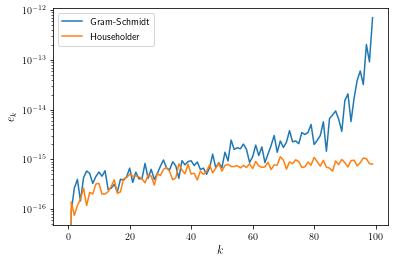

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)


def orthogonality_error(Q):
    '''
    Calculates the maximum orthogonality error for the columns of an 
    orthogonal matrix Q
    '''
    ncols = Q.shape[1]
    e = np.zeros(ncols)
    for j in range(0, ncols):
        for i in range(0, j):
            e[j] = max(e[j], abs(np.dot(Q[:,i], Q[:,j])))
    
    return e


# Generate 50 x 50 random matrix A
np.random.seed(1)
A = np.random.randint(5, size=(100, 100))

# Calculate the QR decomposition of A using the Gram-Schmidt process
# and Householder transformations
Q1, R = qr_gs(A)
Q2, R = qr_hh(A)

# Calculate orthogonality errors
e1 = orthogonality_error(Q1)
e2 = orthogonality_error(Q2)

# Plot orthogonality errors
fig, ax = plt.subplots()

ax.semilogy(e1, label='Gram-Schmidt')
ax.semilogy(e2, label='Householder')

ax.set_xlabel('$k$', fontsize=12)
ax.set_ylabel('$e_k$', fontsize=12)
ax.legend()

plt.show()

Here we can see that the loss of orthogonality using Householder QR decomposition remains fairly constant the same cannot be said of the Gram-Schmidt QR decomposition where the loss of orthogonality increases as we reach the end columns of $Q$. We would expect this to increase further as the size of the matrix $A$ increases.

---
## Summary

- [LU decomposition](#LU-decomposition) decomposes a square matrix in the product of a lower triangular matrix $L$ and an upper triangular matrix $U$.
- [Crout's method](#Crout's-method) is used to solve a system of linear equations using LU decomposition by apply forward and back substitution.
- [Partial pivoting](#Partial-pivoting) ensures that the pivot element has a larger absolute value than the elements in the column below the pivot. This eliminates the problems caused when the pivot element is small resulting in computational rounding errors.
- [Cholesky decomposition](#Cholesky-decomposition) can be applied to decompose a [positive definite](#positive_definite) matrix into the product of a lower triangular matrix $L$ and its transpose. Cholesky decomposition of an $n\times n$ matrix requires fewer operations than the equivalent LU decomposition.
- [QR decomposition](#QR-Decomposition) can be applied to decompose an $m\times n$ matrix into  the product of [orthogonal matrix](#orthogonal_matrix) $Q$ and an $n\times n$ upper triangular matrix $R$. QR decomposition can be calculated using the [Gram-Schmidt](#Calculating-QR-decomposition-using-the-Gram-Schmidt-process) where an orthonormal basis is determined by recursively subtracting the vector projection of non-orthogonal vectors onto known basis vectors or using [Householder transformations](#Calculating-QR-decomposition-using-Householder-transformations) which recursively applies a linear transformation to the columns of $A$ to reflect them onto the basis vector $\mathbf{e}_1$.
- QR decomposition can be used to calculate a solution to an overdetermined system when the number of equations is bigger than the number of unknowns.
- The advantage of using decomposition methods for solving systems of linear equations is that a change in the constant values do not require a recalculation of the decomposition as opposed to [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination).

---
## Tutorial Exercises

1. Solve the following systems of linear equations using [LU decomposition](#LU-decomposition) with a pen and calculator.
 

    (a) 
    
    $$ \begin{aligned}
        2x_1 + 3x_2 - x_3 &= 4, \\
        4x_1 + 9x_2 - x_3 &= 18, \\
        3x_2 + 2x_3 &= 11.
    \end{aligned} $$
    <br><br>
    (b) 
    
    $$ \begin{aligned}
        3x_1 + 9x_2 + 5x_3 &= 20, \\
        x_1 + 2x_2 + 2x_3 &= 3, \\
        2x_1 + 4x_2 + 5x_3 &= 4.
    \end{aligned} $$
    <br><br>
    (c) 
    
    $$ \begin{aligned}
        x_1 + 3x_3 + 2x_4 &= 21, \\
        3x_1 - 2x_2 + 5x_3 + x_4 &= 28, \\
        4x_1 - x_2 - 2x_3 - 3x_4 &= -12, \\
        2x_2 + 3x_4 &= 13.
    \end{aligned} $$
    <br><br>
    (d) 
    
    $$ \begin{aligned}
        x_1 + 5x_2 + 2x_3 + 2x_4 &= -10, \\
        -2x_1 - 4x_2 + 2x_3 &= 10, \\
        3x_1 + x_2 - 2x_3 - x_4 &= -2, \\
        -3x_1 - 3x_2 + 4x_3 - x_4 &= 4.
    \end{aligned} $$

2. Solve the systems from question 1 using [LU decomposition with partial pivoting](#Partial-pivoting) with a pen and calculator.


3. Solve the following systems of linear equations using [Cholesky decomposition](#Cholesky-decomposition) with a pen and calculator.

    (a)
    
    $$ \begin{aligned}
        16x_1 + 16x_2 + 4x_3 &= -8, \\
        16x_1 + 25x_2 + 10x_3 &= -47, \\
        4x_1 + 10x_2 + 6x_3 &= -30.
    \end{aligned} $$
    <br><br>
    (b)
    
    $$ \begin{aligned}
        4x_1 + 2x_2 + 8x_3 &= 36, \\
        2x_1 + 17x_2 + 20x_3 &= 50, \\
        8x_1 + 20x_2 + 41x_3 &= 122.
    \end{aligned} $$
    <br><br>
    (c)
    
    $$ \begin{aligned}
        9x_1 - 9x_2 - 6x_4 &= 12, \\
        -9x_1 + 25x_2 + 8x_3 - 10x_4 &= -116, \\
        8x_2 + 8x_3 - 2x_4 &= -58, \\
        -6x_1 - 10x_2 - 2x_3 + 33x_4 &= 91.
    \end{aligned} $$
    <br><br>
    (d)
    
    $$ \begin{aligned}
        x_1 + 5x_2 - x_3 + 2x_4 &= 14, \\
        5x_1 + 29x_2 + 3x_3 + 12x_4 &= 82, \\
        -x_1 + 3x_2 + 42x_3 - 13x_4 &= 40, \\
        2x_1 + 12x_2 - 13x_3 + 39x_4 &= -34.
    \end{aligned} $$

4. Calculate the [QR decomposition](#QR-decomposition) of the coefficient matrix for the following systems using the [Gram-Schmidt process](#Calculating-QR-decomposition-using-the-Gram-Schmidt-process) with a pen and calculator.

    (a)
    
    $$ \begin{aligned}
        x_1 + x_2 &= 9, \\
        -x_1 &= -5.
    \end{aligned} $$
    <br><br>
    (b)
    
    $$ \begin{aligned}
        6x_1 + 6x_2 + x_3 &= 3, \\
        3x_1 + 6x_2 + x_3 &= 0, \\
        2x_1 + x_2 + x_3 &= 4.
    \end{aligned} $$
    <br><br>
    (c)
    
    $$ \begin{aligned}
        x_1 + 2x_2 + x_3 &= 1, \\
        x_1 + 4x_2 + 3x_3 &= 7, \\
        x_1 - 4x_2 + 6x_3 &= -6, \\
        x_1 + 2x_2 + x_3 &= -1.
    \end{aligned} $$

5. Repeat question 4 using [Householder transformations](#Calculating-QR-decomposition-using-Householder-transformations).

6. Calculate the solutions to the linear systems in question 4 using QR decomposition.

7. Check your solutions to questions 1 to 6 using Python.